[6-12] 데이터 시각화 종합문제 5개

### 문제 1:
`kings_life` 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다.
수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 9          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [3]:
origin = load_data('kings_life')
origin

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


In [4]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   왕       27 non-null     object
 1   수명      27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


In [5]:
df = origin.astype(
    {'왕': 'category'}
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   왕       27 non-null     category
 1   수명      27 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.6 KB


In [6]:
df.drop('왕', axis=1).describe()

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


boxplot:

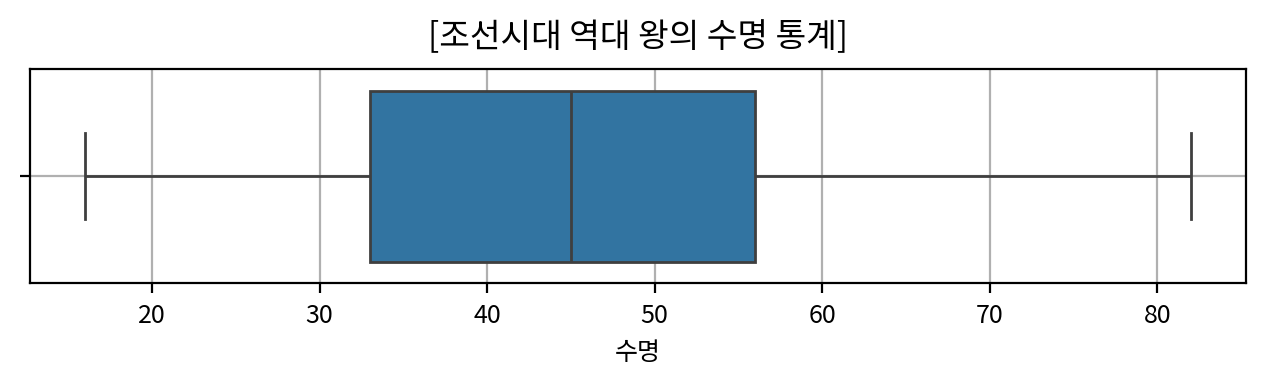

In [7]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data =df, x = '수명')

# 3) 그래프 꾸미기: 
ax.set_title("[조선시대 역대 왕의 수명 통계]", 
             pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

기술통계량 및 boxplot으로 알 수 있는 사실들:
- 총 27명의 역대 왕 수명 데이터에서 평균(≒ 46.04세)은 중앙값(45세)보다 살짝 큰 값을 보여주고 이는 이상치 까지는 아니지만(boxplot으로 확인됨) 큰 값이 존재함을 의미하고 양의 꼬리를 가짐을 보여준다.
- 3사분위수(56)와 1사분위수(33)의 차이는 17인데, 역대 조선시대 왕들의 절반의 수명이 33세~56세 사이에 있음을 말해준다.
- 그리고 나이의 최소값(16세)과 최댓값(82세) 끼리의 차이가 64인 점과 표준편차가 ≒ 16.17 인 것으로 미루어 보아 왕들의 수명은 분산이 크다는 걸 알 수 있다.

나이대를 히스토그램화 하면 나이 구간 별 카운트 갯수 더 디테일하게 원인 알 수 듯? bins 갯수만 함 정해보자

데이터가 27개 즉 50 미만이니 bins는 5~7로 설정 ㄱㄱ

histogram:

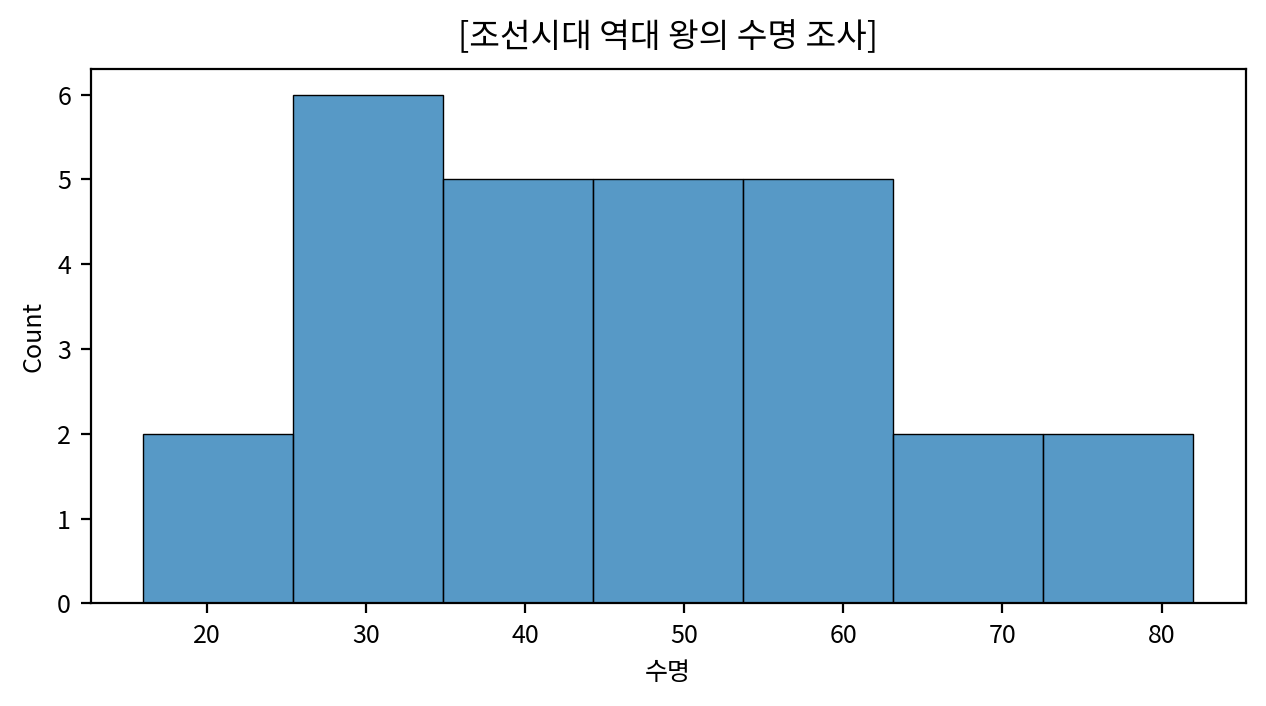

In [8]:
#mybins = [15, 30, 45, 60, 75, 90]

# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) Histogram 그리기
sb.histplot(data = df, x = '수명', bins = 7,
           edgecolor = "#000000", linewidth = 0.5)

# 3) 그래프 꾸미기: 
ax.set_title("[조선시대 역대 왕의 수명 조사]", pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료

### 문제 2:
`stock` 데이터셋은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.
외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [9]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import DataFrame
from pandas import melt
import numpy as np
from sklearn.impute import SimpleImputer

In [10]:
origin = load_data('stock')
origin

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [11]:
kdf = origin.query("구분 == 'K'")
fdf = origin.query("구분 == 'F'")

kdf

,구분,주가
1,K,165
2,K,147
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
15,K,173
19,K,173
21,K,145


In [12]:
fdf

,구분,주가
0,F,120
3,F,144
9,F,147
10,F,235
11,F,161
12,F,139
13,F,150
14,F,157
16,F,139
17,F,150


In [13]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

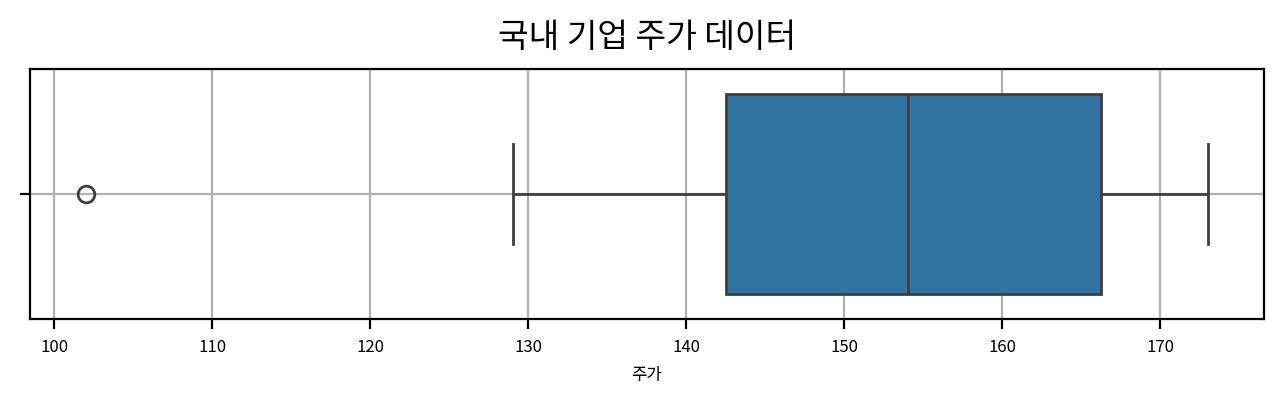

In [14]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = kdf, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("국내 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

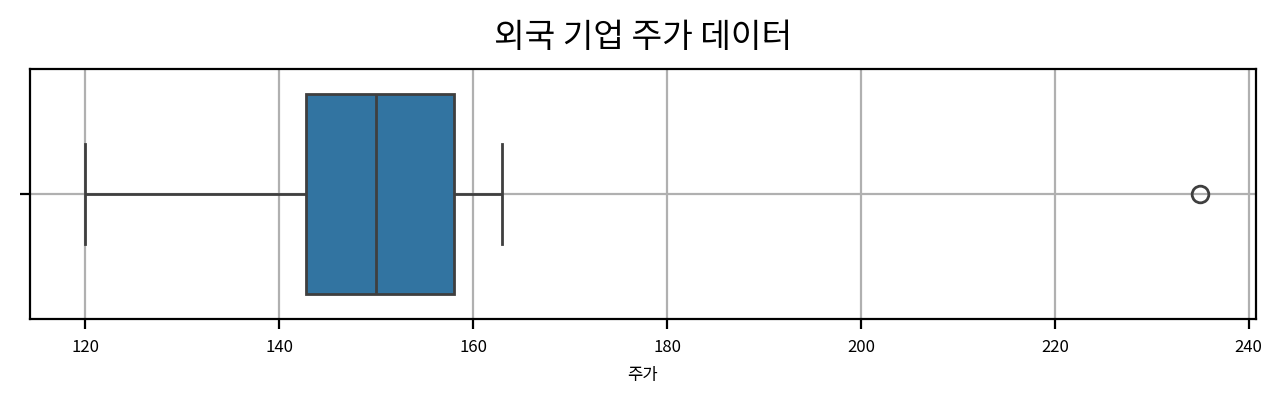

In [15]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = fdf, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("외국 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

국내랑 외국 둘다 이상치 있으니, 두 데이터프레임 다 이상치 정제 한 후에 subplot화 시키자

In [16]:
kdf1 = kdf.copy()
kQ1 = kdf1['주가'].quantile(0.25)
kQ3 = kdf1['주가'].quantile(0.75)
k_outline_min = kQ1 - (kQ3 - kQ1) * 1.5

fdf1 = fdf.copy()
fQ1 = fdf1['주가'].quantile(0.25)
fQ3 = fdf1['주가'].quantile(0.75)
f_outline_max = fQ3 + (fQ3 - fQ1) * 1.5
f_outline_min = fQ1 - (fQ3 - fQ1) * 1.5

In [17]:
kdf1.loc[kdf1['주가'] < k_outline_min, '주가'] = np.nan
kdf1

,구분,주가
1,K,165.0
2,K,147.0
4,K,135.0
5,K,161.0
6,K,NaN
7,K,165.0
8,K,170.0
15,K,173.0
19,K,173.0
21,K,145.0


In [18]:
fdf1.loc[fdf1['주가'] > f_outline_max, '주가'] = np.nan
fdf1

,구분,주가
0,F,120.0
3,F,144.0
9,F,147.0
10,F,NaN
11,F,161.0
12,F,139.0
13,F,150.0
14,F,157.0
16,F,139.0
17,F,150.0


In [19]:
a = kdf1['주가'].mean()
a

np.float64(155.27272727272728)

In [20]:
kdf2 = DataFrame(kdf1['주가'].fillna(value = a).round(1))
kdf2

,주가
1,165.0
2,147.0
4,135.0
5,161.0
6,155.3
7,165.0
8,170.0
15,173.0
19,173.0
21,145.0


In [21]:
b = fdf1['주가'].mean()

fdf2 = DataFrame(fdf1['주가'].fillna(value = b).round(1))
fdf2

,주가
0,120.0
3,144.0
9,147.0
10,147.9
11,161.0
12,139.0
13,150.0
14,157.0
16,139.0
17,150.0


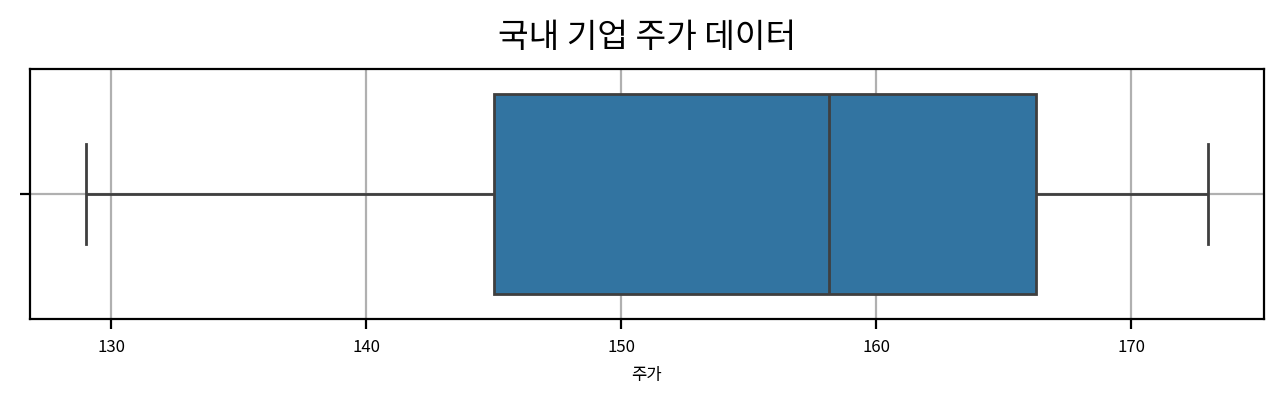

In [22]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = kdf2, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("국내 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

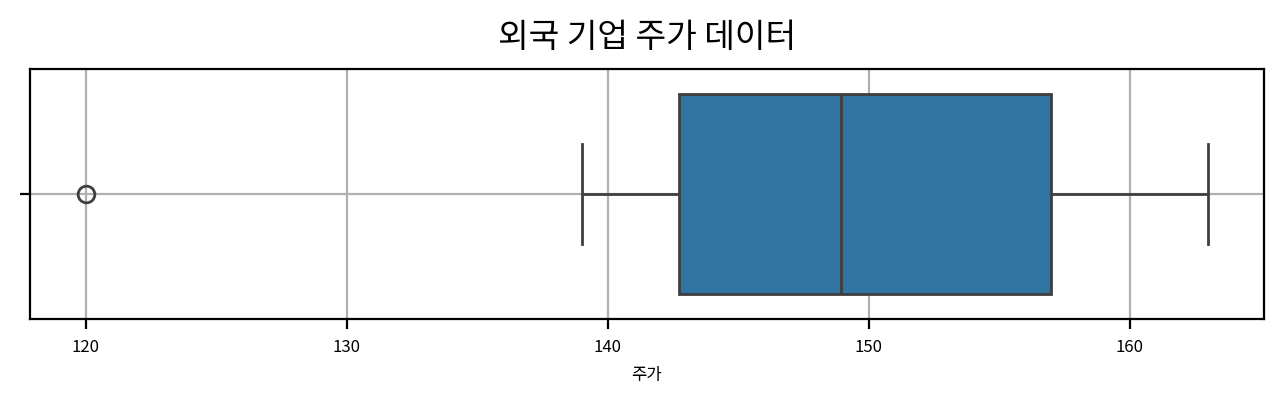

In [23]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = fdf2, x = '주가')

# 3) 그래프 꾸미기: 
ax.set_title("외국 기업 주가 데이터", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

In [24]:
kdf2.describe()

,주가
count,12.000000
mean,155.275000
std,14.918514
min,129.000000
25%,145.000000
50%,158.150000
75%,166.250000
max,173.000000


In [25]:
fdf2.describe()

,주가
count,12.000000
mean,147.908333
std,11.781762
min,120.000000
25%,142.750000
50%,148.950000
75%,157.000000
max,163.000000


비교/분석:
- 주가 평균값은 국내(155.275)가 해외(≒147.91)보다 조금 더 큰 값을 보이고
- 주가 중앙값 또한 국내(158.15)가 해외(≒148.95)보다 큰 값을 보이고 있다.
- 해외, 국내 모두 평균값이 중앙값 보다 작은 것으로 미루어 보았을 때 주가 그래프는 왼쪽에 꼬리가 위치해 있음을 알 수 있다. 
- 표준편차는 국내(≒14.92)가 해외(≒11.78) 보다 크다.
- 데이터의 절반이 분포 되어 있는 구간은 국내는 145.0에서 166.25 사이로 사분위 수 구간의 크기는 25, 해외는 142.75에서 157 사이로 사분위 수 구간의 크기는 14.25이다. 
- 최솟값과 최댓값의 차이는 국내는 44, 해외는 43으로 비슷한 차이를 보이고 있다.

알 수 있는 사실들:
- 위의 내용으로 알 수 있는 사실은 해외의 주가 데이터가 더 고르게 분포되어 있음을 있음과
- 국내, 해외 상관 없이 주가 그래프는 왼쪽에 꼬리가 위치해 있음을 알 수 있다. 

### 문제 3: 
`grape` 데이터셋은 포도농장에서 수집한 비료 종류에 따른 수확량 자료이다. 
비료 종류별로 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [26]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import DataFrame
from pandas import pivot_table
from pandas import melt
import numpy as np

In [27]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [28]:
origin = load_data('grape')
origin.head()

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8


In [29]:
df_A = origin.query('비료종류 == "A"')
df_B = origin.query('비료종류 == "B"')

df_A

,비료종류,수확량
0,A,39.3
2,A,26.6
3,A,23.7
5,A,28.5
6,A,24.2
7,A,17.9
10,A,24.3


In [30]:
df_B

,비료종류,수확량
1,B,11.4
4,B,25.8
8,B,16.5
9,B,21.1


In [31]:
df_A.describe()

,수확량
count,7.000000
mean,26.357143
std,6.578211
min,17.900000
25%,23.950000
50%,24.300000
75%,27.550000
max,39.300000


In [32]:
df_B.describe()

,수확량
count,4.00000
mean,18.70000
std,6.17252
min,11.40000
25%,15.22500
50%,18.80000
75%,22.27500
max,25.80000


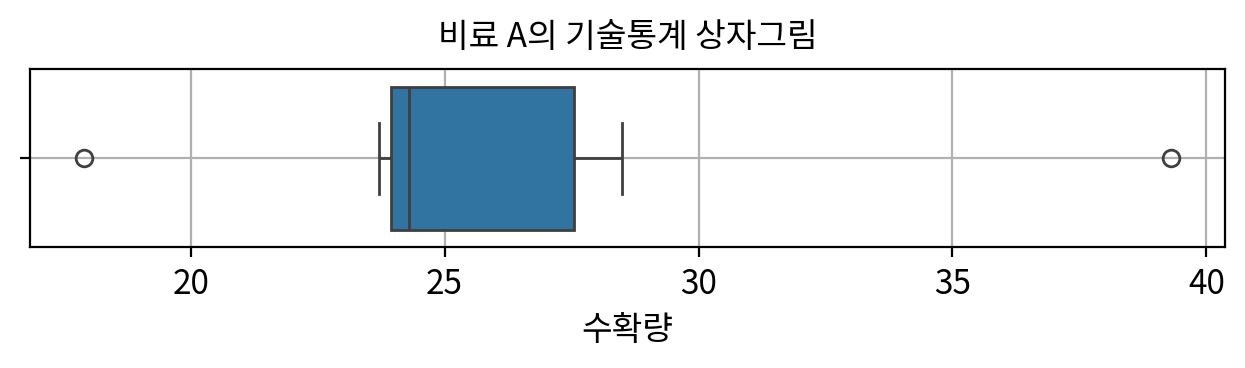

In [33]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = df_A, x = '수확량')

# 3) 그래프 꾸미기: 
ax.set_title("비료 A의 기술통계 상자그림", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

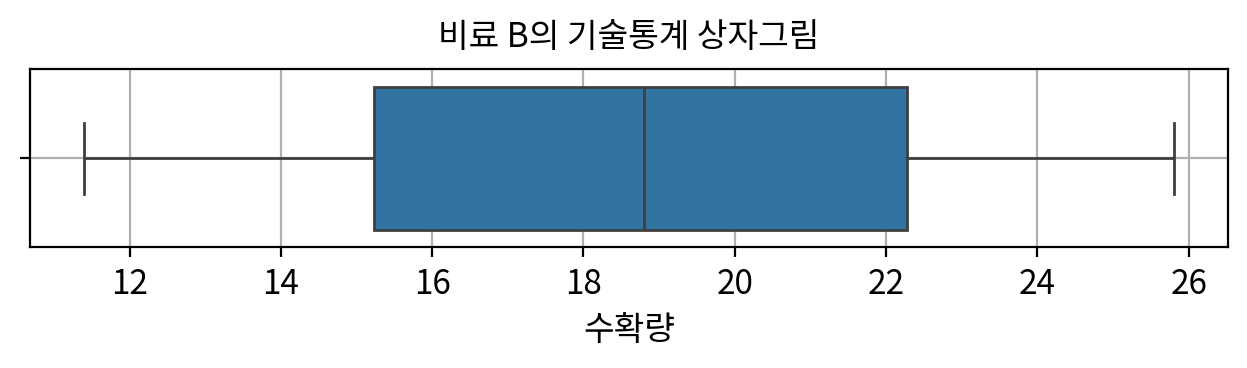

In [34]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = df_B, x = '수확량')

# 3) 그래프 꾸미기: 
ax.set_title("비료 B의 기술통계 상자그림", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

In [35]:
# 이상치가 있는 비료A의 이상치 정제하기

df_A1 = df_A.copy()
aQ1 = df_A1['수확량'].quantile(0.25)
aQ3 = df_A1['수확량'].quantile(0.75)
a_outline_max = aQ3 + (aQ3 - aQ1) * 1.5
a_outline_min = aQ1 - (aQ3 - aQ1) * 1.5

df_A1.loc[df_A1['수확량'] > a_outline_max, '수확량'] = np.nan
df_A1.loc[df_A1['수확량'] < a_outline_min, '수확량'] = np.nan
meanA = df_A1['수확량'].mean()

df_A2 = DataFrame(df_A1['수확량'].fillna(value = meanA).round(1))
df_A2

,수확량
0,25.5
2,26.6
3,23.7
5,28.5
6,24.2
7,25.5
10,24.3


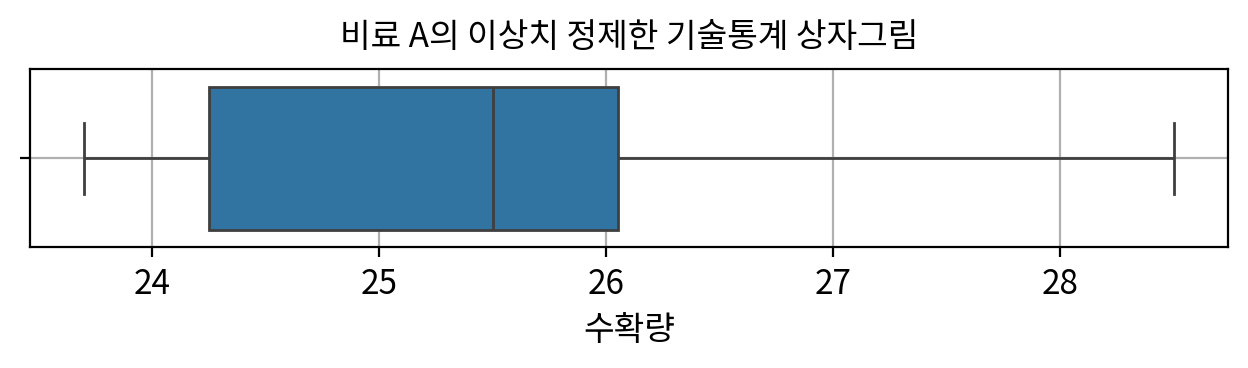

In [36]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = df_A2, x = '수확량')

# 3) 그래프 꾸미기: 
ax.set_title("비료 A의 이상치 정제한 기술통계 상자그림", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

In [37]:
df_A2.describe()

,수확량
count,7.000000
mean,25.471429
std,1.662041
min,23.700000
25%,24.250000
50%,25.500000
75%,26.050000
max,28.500000


In [38]:
df_B.describe()

,수확량
count,4.00000
mean,18.70000
std,6.17252
min,11.40000
25%,15.22500
50%,18.80000
75%,22.27500
max,25.80000


-> 알 수 있는 사실:
- 비료 A, B 둘 다에서 수확량의 평균값은 각각의 중앙값 보다 소숫점 단위 수준에서 작음을 보이고
- 비료 A의 평균 수확량(≒25.47)은 B의 평균 수확량(≒18.7)보다 높음을 보여준다.
- 이상치 처리 전 기술통계로 상자그림을 나타내 보았을 때, 비료 A에서만 이상치가 있음을 보여주었다
- 하여 비료 A에서 이상치를 처리하여 다시 기술통계 및 상자그림을 출력해 본 결과, 이상치 처리 전 두 종류의 비료의 표준편차 차이(A:≒6.58, B:≒6.17)보다 이상치 처리 후 표준편차 차이(A:≒1.66, B:≒6.17)가 더 심해진 것으로 나타났다.
- 이는 애초에 `grape` 원본데이터의 모수가 현저히 작음에서 기인한 것으로 보이는데 (A: 7개, B: 5개), 표본의 갯수가 모집단의 성격을 대변할 만큼 되지 않기 때문이다. 

### 문제 4:
`analysis_grade` 데이터셋은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [39]:
grade = load_data('analysis_grade')
grade.head()

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67


In [40]:
a_grade = grade.query("학과 == 'A'")
a_grade

,학과,점수
1,A,52
2,A,37
4,A,67
6,A,73
9,A,15
11,A,18
12,A,23
13,A,10
15,A,39
18,A,41


In [41]:
c_grade = grade.query("학과 == 'C'")
c_grade

,학과,점수
0,C,54
3,C,41
5,C,43
7,C,51
8,C,55
10,C,52
14,C,48
16,C,51
17,C,82
24,C,90


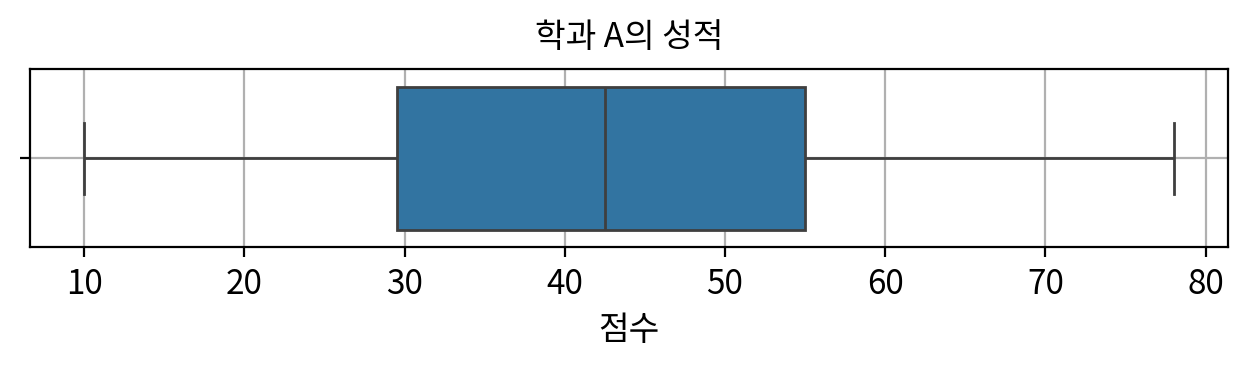

,점수
count,20.000000
mean,43.750000
std,20.229928
min,10.000000
25%,29.500000
50%,42.500000
75%,55.000000
max,78.000000


In [42]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = a_grade, x = '점수')

# 3) 그래프 꾸미기: 
ax.set_title("학과 A의 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

a_grade.describe()

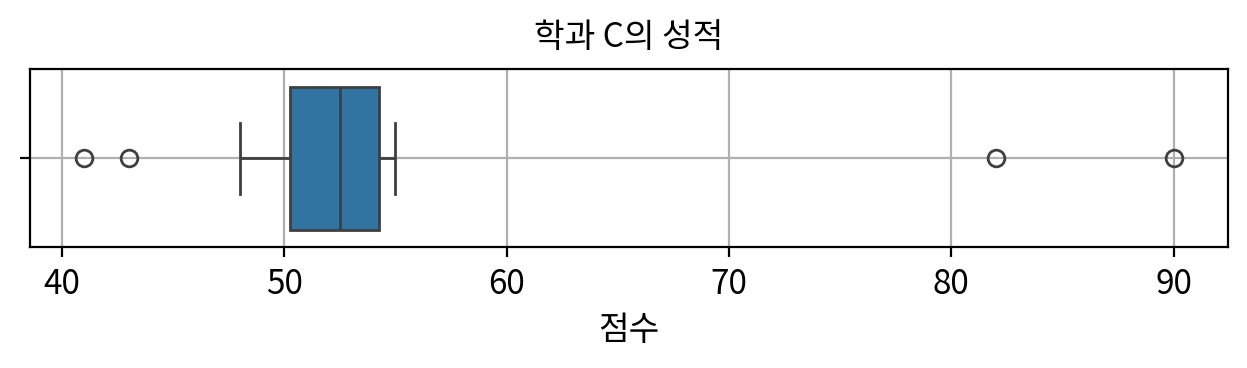

,점수
count,12.000000
mean,56.166667
std,14.689720
min,41.000000
25%,50.250000
50%,52.500000
75%,54.250000
max,90.000000


In [43]:
# 1) 그래프 초기화
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기
sb.boxplot(data = c_grade, x = '점수')

# 3) 그래프 꾸미기: 
ax.set_title("학과 C의 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

c_grade.describe()

-> 알 수 있는 사실:
1. C 학과에서 이상치 처리 하기엔... 
  - 이상치가 없는 A 학과보다도 표본이 작고, 
  - C학과 총 12명 중 이상치가 4명으로 나왔고, 
  - 이상치 처리를 고려할 만한 표본집단 모수도 되지 않기 떄문에 이상치 처리를 하지 않은 상태로 해석해야 할 것 같다.
2.  

### 문제 5:
`stat_comp_grade` 데이터셋은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.
1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.
2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [44]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
import numpy as np

In [45]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [46]:
origin = load_data('stat_comp_grade')
origin

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [47]:
df = origin.replace({'전공': 'STAT'}, 1)
df2 = df.replace({'전공':'COMP'}, 2)
df2

C:\Users\itwill\AppData\Local\Temp\ipykernel_13328\2708505694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df.replace({'전공':'COMP'}, 2)


,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


In [48]:
df2['중간고사'].astype(int)
df2['기말고사'].astype(int)
# df2.info()
major1 = df2.query("전공 == 1")
major2 = df2.query("전공 == 2")

mid = df2['중간고사']
final = df2['기말고사']

In [49]:
mid.describe()

count    20.000000
mean     65.150000
std      19.647619
min      31.000000
25%      48.500000
50%      67.500000
75%      78.500000
max      94.000000
Name: 중간고사, dtype: float64

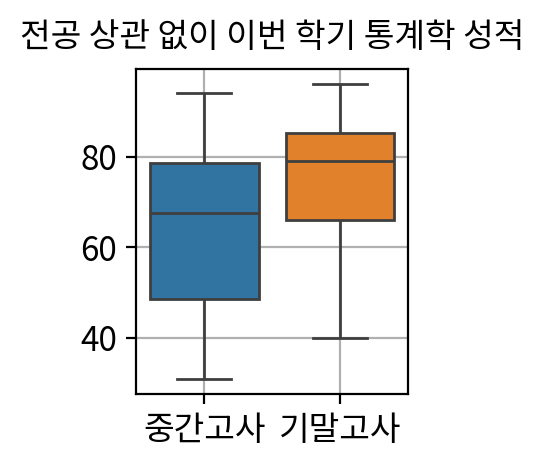

,중간고사,기말고사
count,20.000000,20.000000
mean,65.150000,75.650000
std,19.647619,15.597824
min,31.000000,40.000000
25%,48.500000,66.000000
50%,67.500000,79.000000
75%,78.500000,85.250000
max,94.000000,96.000000


In [50]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 400             # 그래프 가로 크기
height_px = 500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = df2[['중간고사', '기말고사']])

# 3) 그래프 꾸미기: 
ax.set_title("전공 상관 없이 이번 학기 통계학 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

df2.drop('전공', axis=1).describe()

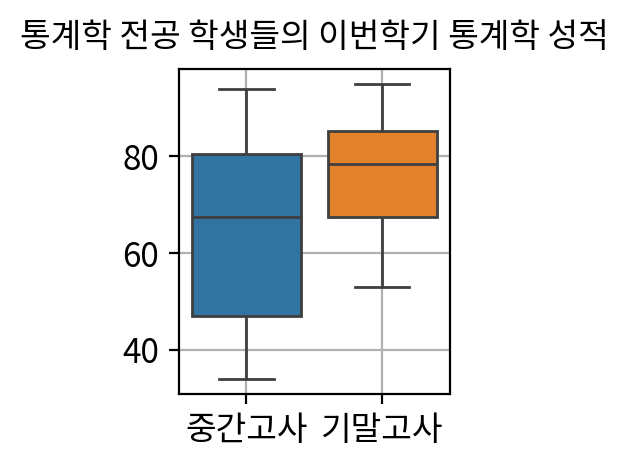

,전공,중간고사,기말고사
count,12.0,12.000000,12.000000
mean,1.0,64.833333,76.166667
std,0.0,21.225342,13.953386
min,1.0,34.000000,53.000000
25%,1.0,47.000000,67.500000
50%,1.0,67.500000,78.500000
75%,1.0,80.500000,85.250000
max,1.0,94.000000,95.000000


In [51]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 400             # 그래프 가로 크기
height_px = 500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = major1[['중간고사', '기말고사']])

# 3) 그래프 꾸미기: 
ax.set_title("통계학 전공 학생들의 이번학기 통계학 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

major1.describe()

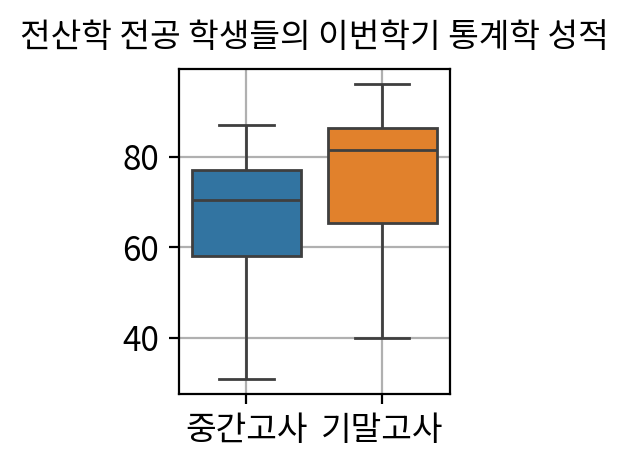

,전공,중간고사,기말고사
count,8.0,8.000000,8.000000
mean,2.0,65.625000,74.875000
std,0.0,18.423103,18.795421
min,2.0,31.000000,40.000000
25%,2.0,58.000000,65.250000
50%,2.0,70.500000,81.500000
75%,2.0,77.000000,86.250000
max,2.0,87.000000,96.000000


In [52]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 400             # 그래프 가로 크기
height_px = 500             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기: seaborn 사용
sb.boxplot(data = major2[['중간고사', '기말고사']])

# 3) 그래프 꾸미기: 
ax.set_title("전산학 전공 학생들의 이번학기 통계학 성적", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

major2.describe()

-> 알 수 있는 사실:
- 전공 상관 없이 평균점수만 놓고 봤을 때는 이번 학기 중간고사보다 기말고사가 더 어려웠다
- 중간고사: 통계학 과목인데도 불구하고 통계학 전공 학생들보다 전산학 전공 학생들이 시험 더 잘봤다 (통계학 빠가..?)
  - 왜그런가 봤더니,, 통계학 전공 학생 중 일부가 점수가 개판이여서 평균 까내렸네 (30~40점대 학생 수: 통계학과 (4명), 전산학과(2명))
- 기말고사: 통계 전공 학생들이 긁혔는지 기말에선 전산학 학생들보다 평균 점수 더 높임
  - 중간 때 30~40점대 맞은 통계 전공 학생들이 기말 때 4명 다 성적 올렸고 (34 -> 86, 47 -> 57, 38 -> 53, 47 -> 60) 그 중엔 50점 이상 올린 학생도 있었음
  - 중간 때 30~40점대 맞은 전산학 전공 학생들도 기말 때 성적 올리긴 했는데 (2: 31 -> 68, 49 -> 57) 
  - 아무래도 통계전공 학생 중 기말에서 50점 이상 올린 학생의 영향이 좀 컸던 거 같다 (ㄹㅇ 빡공했나보네 ㅎ)